In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_excel('D:/DO_NOT_REMOVE/Data_Analyst_Junior/18/input_data.xlsx', index_col=0)
df.head()

,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,ТТЕ7227715*****,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,NaN,12.41768,22660.000080,NaN
1,ТТЕ7227715*****,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,NaN,21.73094,56650.000199,NaN
2,БАДАМСТЕ55*****,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,NaN,12.41768,22660.000080,NaN
3,ТТЕ7227715*****,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,NaN,17.38022,22660.000080,NaN
4,ТТЕ7227715*****,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,NaN,21.73094,56650.000199,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3710
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   contract_num          3711 non-null   object 
 1   product_name          3711 non-null   object 
 2   client_id             3711 non-null   int64  
 3   contract_status       3711 non-null   object 
 4   currency_name         3711 non-null   object 
 5   duration              3711 non-null   int64  
 6   country               3711 non-null   object 
 7   age                   3711 non-null   int64  
 8   sex                   3711 non-null   object 
 9   price                 3711 non-null   int64  
 10  insurance_amount      3711 non-null   int64  
 11  loss_payout_amt       45 non-null     float64
 12  price_usd             3591 non-null   float64
 13  insurance_amount_usd  3591 non-null   float64
 14  loss_payout_amt_usd   43 non-null     float64
dtypes: float64(4), int64(5), o

In [43]:
# Рассчитываем базовые показатели качества данных
def calculate_quality_metrics(df):
    metrics = {}
    metrics['Пропуски'] = df.isna().sum()
    metrics['Процент ропущенных значений'] = df.isna().mean() * 100
    metrics['Уникальные значения'] = df.nunique()
    metrics['Дубликаты'] = df.duplicated().sum()
    return pd.DataFrame(metrics)

In [44]:
metrics = calculate_quality_metrics(df)
print("Показатели качества данных:")
print(metrics)

Показатели качества данных:
                      missing_values  missing_values_percent  unique_values  \
contract_num                       0                0.000000             79   
product_name                       0                0.000000              2   
client_id                          0                0.000000           3711   
contract_status                    0                0.000000              2   
currency_name                      0                0.000000              2   
duration                           0                0.000000             23   
country                            0                0.000000             20   
age                                0                0.000000             52   
sex                                0                0.000000              2   
price                              0                0.000000             45   
insurance_amount                   0                0.000000              6   
loss_payout_amt         

In [45]:
df['currency_name'].value_counts(dropna=False)

currency_name
Российский рубль    3591
Доллар США           120
Name: count, dtype: int64

In [46]:
filled_df = df.copy()

In [47]:
filled_df.shape

(3711, 15)

In [48]:
#Заполняем пропуски в колонках loss_payout_amt,loss_payout_amt_usd  нулями
filled_df[['loss_payout_amt','loss_payout_amt_usd']] = filled_df[['loss_payout_amt','loss_payout_amt_usd']].fillna(0)

In [49]:
#Заполняем пропуски в колонках из columns_to_convert значениями в долларах США
columns_to_convert = ['price', 'insurance_amount', 'loss_payout_amt']
for column in columns_to_convert:
    filled_df.loc[(filled_df['currency_name'] == 'Доллар США'), f'{column}_usd'] = filled_df.loc[(filled_df['currency_name'] == 'Доллар США'),column]

In [50]:
metrics = calculate_quality_metrics(filled_df)
print("Показатели качества данных:")
print(metrics)

Показатели качества данных:
                      missing_values  missing_values_percent  unique_values  \
contract_num                       0                     0.0             79   
product_name                       0                     0.0              2   
client_id                          0                     0.0           3711   
contract_status                    0                     0.0              2   
currency_name                      0                     0.0              2   
duration                           0                     0.0             23   
country                            0                     0.0             20   
age                                0                     0.0             52   
sex                                0                     0.0              2   
price                              0                     0.0             45   
insurance_amount                   0                     0.0              6   
loss_payout_amt         

На основе этой таблицы рассчитайте базовые показатели, отражающие качество данных, используя средства Python.
Повысьте эти показатели за счёт очистки витрины данных от аномалий.
Сохраните итоговую витрину (таблицу с полученными данными) в формате Excel.

In [71]:
encoded_df= filled_df.copy()

In [72]:
# Инициализация LabelEncoder для каждой колонки
label_encoders = {}
for column in ['product_name','contract_status', 'sex', 'currency_name']:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column])
    label_encoders[column] = le

In [73]:
encoded_df.head()

,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,ТТЕ7227715*****,0,10161870404,0,1,10,Беларусь,20,1,1096,2000000,0.0,12.41768,22660.000080,0.0
1,ТТЕ7227715*****,0,1017159879,0,1,7,Индонезия,55,1,1918,5000000,0.0,21.73094,56650.000199,0.0
2,БАДАМСТЕ55*****,0,10161883357,0,1,10,Беларусь,61,0,1096,2000000,0.0,12.41768,22660.000080,0.0
3,ТТЕ7227715*****,0,100766461,0,1,14,Грузия,25,1,1534,2000000,0.0,17.38022,22660.000080,0.0
4,ТТЕ7227715*****,0,10171604758,0,1,7,Аргентина,33,1,1918,5000000,0.0,21.73094,56650.000199,0.0


In [91]:
number = ['client_id','product_name','contract_status', 'currency_name','duration','age','sex', 'price','insurance_amount', 'loss_payout_amt', 'price_usd'
          ,'insurance_amount_usd',  'loss_payout_amt_usd']

In [92]:
df_num = encoded_df[number]

In [93]:
# Найдем, при превышении каких значений различных признаков объект может считаться выбросом
df_num.drop("client_id", axis=1).quantile(0.997)

product_name            1.000000e+00
contract_status         1.000000e+00
currency_name           1.000000e+00
duration                3.650000e+02
age                     8.474000e+01
sex                     1.000000e+00
price                   6.000000e+04
insurance_amount        5.000000e+06
loss_payout_amt         1.500000e+05
price_usd               6.798000e+02
insurance_amount_usd    1.000000e+05
loss_payout_amt_usd     2.266000e+03
Name: 0.997, dtype: float64

In [94]:
df_num.columns

Index(['client_id', 'product_name', 'contract_status', 'currency_name',
       'duration', 'age', 'sex', 'price', 'insurance_amount',
       'loss_payout_amt', 'price_usd', 'insurance_amount_usd',
       'loss_payout_amt_usd'],
      dtype='object')

In [95]:
# Количество выбросов в каждой колонке
for column in df_num.drop("client_id", axis=1).columns:
    print (column, encoded_df[encoded_df[column] > df_num[column].quantile(0.997)].shape[0])

product_name 0
contract_status 0
currency_name 0
duration 0
age 12
sex 0
price 0
insurance_amount 0
loss_payout_amt 11
price_usd 9
insurance_amount_usd 0
loss_payout_amt_usd 11


In [96]:
filled_df[filled_df.age > df_num.age.quantile(0.997)]

,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
56,ДСЖ-5/1539*****,Страхование путешественников USD,100785487,Действует,Доллар США,12,США,89,M,66,100000,0.0,66.00000,100000.000000,0.000000
289,ТМГО5Е7 № *****,Страхование путешественников,1001198959,Действует,Российский рубль,14,Турция,85,F,2301,3000000,50000.0,26.07033,33990.000119,566.500002
616,ТТЕ7227779*****,Страхование путешественников,10118068480,Действует,Российский рубль,17,Турция,85,F,4658,5000000,0.0,52.77514,56650.000199,0.000000
907,ТТЕ7227715*****,Страхование путешественников,10014508631,Завершен,Российский рубль,10,Азербайджан,85,F,1096,2000000,0.0,12.41768,22660.000080,0.000000
918,ДСЖ-5/1539*****,Страхование путешественников,100543063,Действует,Российский рубль,13,Турция,89,M,2137,3000000,40000.0,24.21221,33990.000119,453.200002
1697,ТТЕ7227778*****,Страхование путешественников USD,100087688,Действует,Доллар США,10,США,85,F,27,50000,0.0,27.00000,50000.000000,0.000000
1927,ТМГЩ5Е3 № *****,Страхование путешественников,101115143,Действует,Российский рубль,10,Армения,85,F,1096,2000000,0.0,12.41768,22660.000080,0.000000
2244,ДСЖ-5/1539*****,Страхование путешественников,1014163760,Действует,Российский рубль,10,Казахстан,89,M,1096,2000000,0.0,12.41768,22660.000080,0.000000
3177,ТМГФ5Е7 № *****,Страхование путешественников USD,10017974079,Завершен,Доллар США,14,США,89,M,38,50000,0.0,38.00000,50000.000000,0.000000
3249,ТТЕ7227778*****,Страхование путешественников USD,10033041369,Действует,Доллар США,14,США,89,M,77,100000,0.0,77.00000,100000.000000,0.000000


<Axes: xlabel='age'>

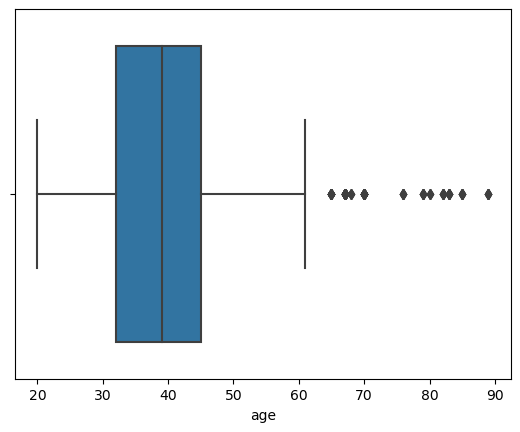

In [97]:
sns.boxplot(data=filled_df, x="age")

<Axes: xlabel='age', ylabel='loss_payout_amt_usd'>

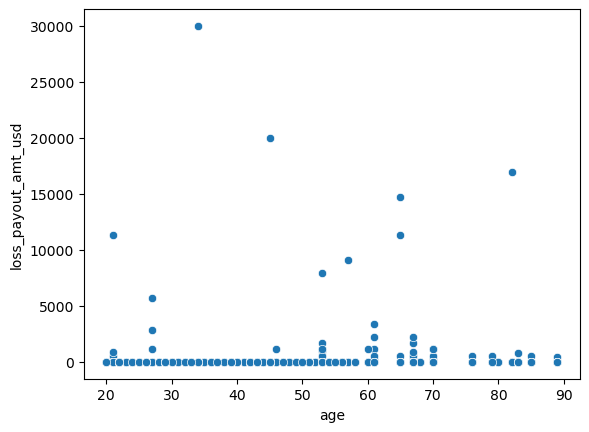

In [98]:
sns.scatterplot(data=filled_df, x="age", y="loss_payout_amt_usd")

In [99]:
df_num.head()

,client_id,product_name,contract_status,currency_name,duration,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
0,10161870404,0,0,1,10,20,1,1096,2000000,0.0,12.41768,22660.000080,0.0
1,1017159879,0,0,1,7,55,1,1918,5000000,0.0,21.73094,56650.000199,0.0
2,10161883357,0,0,1,10,61,0,1096,2000000,0.0,12.41768,22660.000080,0.0
3,100766461,0,0,1,14,25,1,1534,2000000,0.0,17.38022,22660.000080,0.0
4,10171604758,0,0,1,7,33,1,1918,5000000,0.0,21.73094,56650.000199,0.0


In [100]:
from sklearn.ensemble import IsolationForest

In [101]:
clf = IsolationForest()
pred_if = clf.fit_predict(df_num.drop("client_id", axis=1))

In [102]:
df_num.drop("client_id", axis=1)[pred_if == -1].shape

(591, 12)

In [103]:
df_num[pred_if == -1].shape

(591, 13)

In [106]:
df_num[pred_if == -1]

,client_id,product_name,contract_status,currency_name,duration,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd
5,100651616,0,0,1,30,33,0,4932,3000000,0.0,55.87956,33990.000119,0.0
6,1006516184,0,0,1,30,38,1,4932,3000000,0.0,55.87956,33990.000119,0.0
8,1006516193,0,0,1,30,41,1,4932,3000000,0.0,55.87956,33990.000119,0.0
13,100654779,0,0,1,30,40,0,4932,3000000,0.0,55.87956,33990.000119,0.0
15,100655341,0,0,1,30,31,0,4932,3000000,0.0,55.87956,33990.000119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,100516670,1,0,0,14,43,0,77,100000,0.0,77.00000,100000.000000,0.0
3492,10053311067,1,0,0,14,39,0,77,100000,0.0,77.00000,100000.000000,0.0
3533,1005608103,1,0,0,14,43,1,77,100000,0.0,77.00000,100000.000000,0.0
3593,10168801191,0,0,1,7,67,1,1918,5000000,0.0,21.73094,56650.000199,0.0


In [90]:
# Добавляем колонку anomaly, свидетельствующую об аномальности строки датасета, и значения: 1, если запись является аномальной, 0 — в противном случае.
df_extended= filled_df.copy()

In [110]:
anomalous_clients = df_num[pred_if == -1]['client_id']

In [111]:
df_extended['anomaly'] = df_extended['client_id'].apply(lambda x: 1 if x in anomalous_clients.values else 0)

In [112]:
df_extended.head()

,contract_num,product_name,client_id,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,ТТЕ7227715*****,Страхование путешественников,10161870404,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0.0,12.41768,22660.000080,0.0,0
1,ТТЕ7227715*****,Страхование путешественников,1017159879,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0.0,21.73094,56650.000199,0.0,0
2,БАДАМСТЕ55*****,Страхование путешественников,10161883357,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0.0,12.41768,22660.000080,0.0,0
3,ТТЕ7227715*****,Страхование путешественников,100766461,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0.0,17.38022,22660.000080,0.0,0
4,ТТЕ7227715*****,Страхование путешественников,10171604758,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0.0,21.73094,56650.000199,0.0,0


In [118]:
df_extended[df_extended['anomaly']==1].shape

(591, 16)

In [117]:
df_extended[df_extended['anomaly']==1].shape[0]+df_extended[df_extended['anomaly']==0].shape[0]==df.shape[0]

True

In [119]:
# Сохранить новый DataFrame в файл xlsx
df_extended.to_excel('D:/DO_NOT_REMOVE/Data_Analyst_Junior/18/df_extended.xlsx', index=False)

In [120]:
#df_without_anomalies= df_extended[df_extended['anomaly']==0]

In [ ]:
#df_without_anomalies.to_excel('D:/DO_NOT_REMOVE/Data_Analyst_Junior/18/df_without_anomalies.xlsx', index=False)